In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import streamlit as st

In [3]:
df = pd.read_excel('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.duplicated().mean()

0.02059346625479734

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10463,10463,10463,10463,10462,10463,10463,10463,10462,10463,10463.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3700,490,4346,4346,2376,233,412,544,5625,8183,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9026.642454
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4624.653227
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5224.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8266.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12343.500000


In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Feature Engineering

In [8]:
df['Day_of_Journey'] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
print(df['Day_of_Journey'])

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Day_of_Journey, Length: 10463, dtype: int32


In [9]:
df['Number_of_Dep_Time'] = df['Dep_Time'].str.replace(':','.').astype(float)
df['Number_of_Dep_Time']

0        22.20
1         5.50
2         9.25
3        18.05
4        16.50
         ...  
10678    19.55
10679    20.45
10680     8.20
10681    11.30
10682    10.55
Name: Number_of_Dep_Time, Length: 10463, dtype: float64

In [10]:
df['Number_Duration'] = df['Duration'].str.replace('h','.').str.replace('m','').str.replace(' ','').astype(float)
df['Number_Duration']

0         2.50
1         7.25
2        19.00
3         5.25
4         4.45
         ...  
10678     2.30
10679     2.35
10680     3.00
10681     2.40
10682     8.20
Name: Number_Duration, Length: 10463, dtype: float64

In [11]:
# Check the condition and update 'Day_of_Journey' accordingly
condition = df['Number_of_Dep_Time'] + df['Number_Duration'] > 24
df.loc[condition, 'Day_of_Journey'] += 1

df['Day_Arrival'] = df['Day_of_Journey']

# Now, df['Day_of_Journey'] has been updated based on the condition
print(df['Day_of_Journey'])


0        25
1         1
2        10
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Day_of_Journey, Length: 10463, dtype: int32


In [12]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Number_of_Dep_Time,Number_Duration,Day_Arrival
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,25,22.20,2.50,25
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5.50,7.25,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,10,9.25,19.00,10
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,18.05,5.25,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,16.50,4.45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,19.55,2.30,9
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,20.45,2.35,27
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,8.20,3.00,27
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,11.30,2.40,1


## Visualiztions

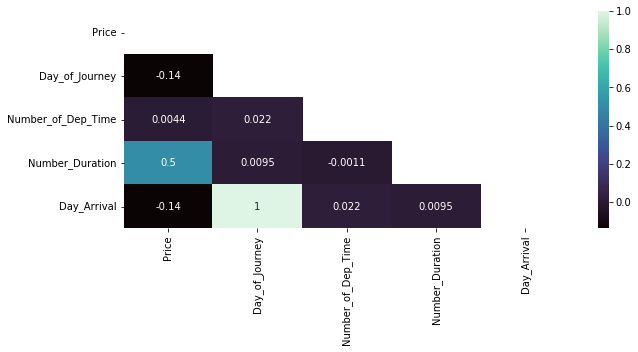

In [29]:
plt.figure(figsize=(10,4))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='mako',mask=np.triu(corr))
plt.show()

### Which month had the most number of enrolled flight tickits

In [39]:
df['Date_of_Journey'].str.split('/').str[1].astype(int).value_counts()

5    3396
6    3311
3    2678
4    1078
Name: Date_of_Journey, dtype: int64

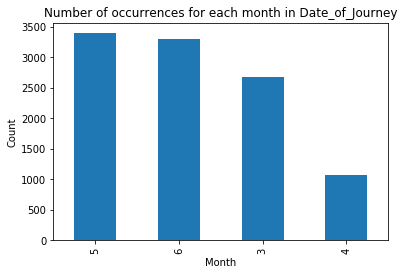

In [40]:
import matplotlib.pyplot as plt

counts = df['Date_of_Journey'].str.split('/').str[1].astype(int).value_counts()

counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of occurrences for each month in Date_of_Journey')
plt.show()


In [12]:
import plotly.express as px

## Dealing with Missing Values

In [13]:
df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price                 0
Day_of_Journey        0
Number_of_Dep_Time    0
Number_Duration       0
Day_Arrival           0
dtype: int64

In [14]:
df[df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Number_of_Dep_Time,Number_Duration,Day_Arrival
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480,7,9.45,23.4,7


In [15]:
df = df.drop(9039)

In [16]:
df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price                 0
Day_of_Journey        0
Number_of_Dep_Time    0
Number_Duration       0
Day_Arrival           0
dtype: int64

## Dealing with Outliers

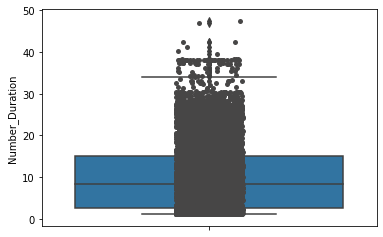

In [50]:
# Checking that we removed the outliers
sns.boxplot(data=df , y=df['Number_Duration'])
sns.stripplot(y=df['Number_Duration'], data=df, color="#474646")

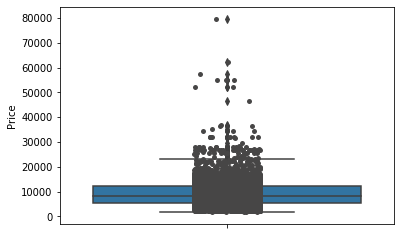

In [16]:
# Checking that we removed the outliers
sns.boxplot(data=df , y=df['Price'])
sns.stripplot(y=df['Price'], data=df, color="#474646")

In [45]:
from scipy import stats
 
z = np.abs(stats.zscore(df['Number_Duration']))
out = df.loc[z>3].index
len(out)

63

In [46]:
df['Number_Duration'].iloc[out] = df['Number_Duration'].median()

C:\Users\Seif\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



IndexError: index 10639 is out of bounds for axis 0 with size 10462

In [ ]:
df['Price'].median()

In [22]:
df['Number_Duration'].median()

8.4

In [47]:
from scipy import stats
 
z = np.abs(stats.zscore(df['Price']))
out = df.loc[z>3.5].index
len(out)

81

In [21]:
df['Price'].iloc[out] = df['Price'].median()

In [17]:
df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [17]:
# Creating a lsit of values for the traffic Status in a dictionry
stops_dict = {'non-stop' : 0,
                  '1 stop' : 1,
                  '2 stops' : 2,
                  '3 stops' : 3,
                  '4 stops' : 4}
# For Reversing the keys and vlues of the dictionary to retrive the encoded values using copmrehension for loop
rev_stops_dict = {value: key for key, value in stops_dict.items()}

In [18]:
df['Total_Stops'] = df['Total_Stops'].map(stops_dict)
df['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10462, dtype: int64

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , RobustScaler , StandardScaler
from category_encoders.binary import BinaryEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [20]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,2,3])], remainder='passthrough')

In [30]:
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 0.0, ..., '2h 50m', 'non-stop', 'No info'],
       [0.0, 1.0, 0.0, ..., '7h 25m', '2 stops', 'No info'],
       [0.0, 0.0, 0.0, ..., '19h', '2 stops', 'No info'],
       ...,
       [0.0, 0.0, 0.0, ..., '3h', 'non-stop', 'No info'],
       [0.0, 0.0, 0.0, ..., '2h 40m', 'non-stop', 'No info'],
       [0.0, 1.0, 0.0, ..., '8h 20m', '2 stops', 'No info']], dtype=object)

In [31]:
X = pd.DataFrame(X)

In [32]:
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9/04/2019,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,27/04/2019,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,27/04/2019,BLR → DEL,08:20,11:20,3h,non-stop,No info
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,01/03/2019,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info


In [33]:
X.drop([25,26,27,28,29] , axis = 1 , inplace = True)

In [34]:
X.drop([23,24] , axis = 1 , inplace = True)

In [35]:
from sklearn.preprocessing import RobustScaler

In [36]:
scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 7152.  6171.]
 [ 5328.  3873.]
 [ 9352. 10991.]
 ...
 [ 6776. 11982.]
 [11440.  9663.]
 [10400.  9181.]]


In [40]:
# Evaluate the model
print('R-squared:', regressor.score(X_test, y_test))
print('Adjusted R-squared:', 1 - (1 - regressor.score(X_test, y_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

R-squared: 0.46523493213442313
Adjusted R-squared: 0.45941401563612305
Coefficients: [-3.40e+16 -3.40e+16 -3.40e+16 -3.40e+16 -3.40e+16 -3.40e+16 -3.40e+16
 -3.40e+16 -3.40e+16 -3.40e+16 -3.40e+16 -3.40e+16 -1.11e+17 -4.84e+16
  5.32e+16  4.20e+16  4.26e+16  4.33e+16  3.21e+16  1.96e+17  4.26e+16
  1.34e+17  1.96e+17]
Intercept: -5.13180123402859e+16


NameError: name 'metrics' is not defined

In [188]:
print('X= ',X)

X=  [[0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]]


In [189]:
print('Y= ',y)

Y=  [ 3897  7662 13882 ...  7229 12648 11753]


In [196]:
y_test

array([ 6171,  3873, 10991, ..., 11982,  9663,  9181], dtype=int64)

In [199]:
y_pred

numpy.ndarray

ValueError: x and y must be the same size

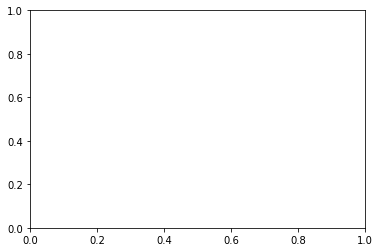

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting actual vs predicted values
plt.scatter(X_train, X_test)
plt.plot(y_test, y_pred, color = 'blue')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()



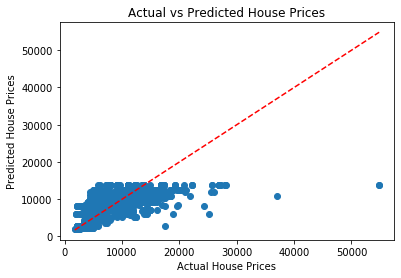

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


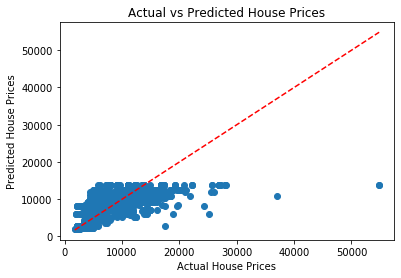

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line for reference
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


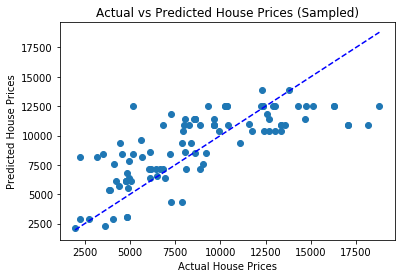

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Randomly sample 100 points
random_indices = np.random.choice(len(y_test), size=100, replace=False)

# Plotting actual vs predicted values for the sampled points
plt.scatter(y_test[random_indices], y_pred[random_indices])
plt.plot([min(y_test[random_indices]), max(y_test[random_indices])], 
         [min(y_test[random_indices]), max(y_test[random_indices])], color='blue', linestyle='--')  # Diagonal line for reference

plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices (Sampled)')
plt.show()


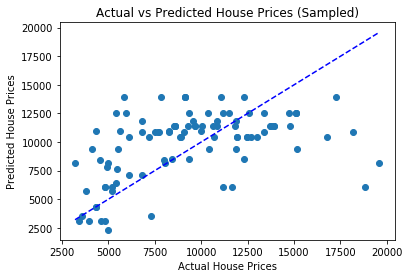

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Randomly sample 100 points
random_indices = np.random.choice(len(y_test), size=100, replace=False)

# Plotting actual vs predicted values for the sampled points
plt.scatter(y_test[random_indices], y_pred[random_indices])
plt.plot([min(y_test[random_indices]), max(y_test[random_indices])], 
         [min(y_test[random_indices]), max(y_test[random_indices])], color='blue', linestyle='--')  # Diagonal line for reference

plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices (Sampled)')
plt.show()


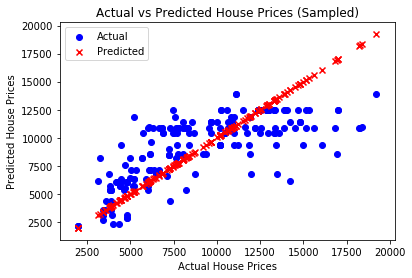

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Randomly sample 100 points
random_indices = np.random.choice(len(y_test), size=200, replace=False)

# Plotting actual vs predicted values for the sampled points
plt.scatter(y_test[random_indices], y_pred[random_indices], color='blue', label='Actual')
plt.scatter(y_test[random_indices], y_test[random_indices], color='red', label='Predicted', marker='x')  # Using a different color for predicted points
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices (Sampled)')
plt.legend()
plt.show()


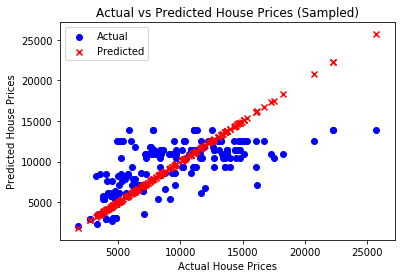

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Randomly sample 100 points
random_indices = np.random.choice(len(y_test), size=200, replace=False)

# Plotting actual vs predicted values for the sampled points
plt.scatter(y_test[random_indices], y_pred[random_indices], color='blue', label='Actual')
plt.scatter(y_test[random_indices], y_test[random_indices], color='red', label='Predicted', marker='x')  # Using a different color for predicted points
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices (Sampled)')
plt.legend()
plt.show()


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Assuming X and y are your NumPy arrays
X = np.random.rand(100, 15)  # Example data
y = np.random.rand(100)  # Example target variable

# Assuming you have an encoder named 'Encoder'
#Encoder = ColumnTransformer(transformers=[("BE",BinaryEncoder() , ["Airline","Source","Destination"]) ] , remainder="passthrough")  # Replace with your encoder

# Define the Keras model function
def create_model():
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the Keras model in a scikit-learn compatible wrapper
keras_regressor = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# Create a pipeline with the models
models = []
models.append(("LR", LinearRegression()))
models.append(("SVR", SVR(kernel='rbf')))
models.append(("DTR", DecisionTreeRegressor(random_state=0)))
models.append(("RFR", RandomForestRegressor(n_estimators=10, random_state=0)))
models.append(("NN", keras_regressor))

for model in models:
    steps = []
    steps.append(("Encoder", Encoder))
    steps.append(("Scaler", RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps=steps)
    
    # Convert X and y to Pandas DataFrames
    X_df = pd.DataFrame(X)
    y_df = pd.Series(y, name='target')

    # Resetting index for X and y before cross_val_predict
    X_reset_index = X_df.reset_index(drop=True)
    y_reset_index = y_df.reset_index(drop=True)
    
    y_pred = cross_val_predict(pipeline, X_reset_index, y_reset_index, cv=5)
    
    # Randomly sample 100 points
    random_indices = np.random.choice(len(y_reset_index), size=200, replace=False)

    # Plotting actual vs predicted values for the sampled points
    plt.scatter(y_reset_index.iloc[random_indices], y_pred[random_indices], color='blue', label='Actual')
    plt.scatter(y_reset_index.iloc[random_indices], y_reset_index.iloc[random_indices], color='red', label='Predicted', marker='x')  # Using a different color for predicted points
    plt.xlabel('Actual House Prices')
    plt.ylabel('Predicted House Prices')
    plt.title('Actual vs Predicted House Prices (Sampled)')
    plt.legend()
    plt.show()

    # Other metric printing remains unchanged
    result = cross_validate(pipeline, X_reset_index, y_reset_index, cv=5, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], return_train_score=True)
    
    for metric in ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']:
        train_key = f'train_{metric}'
        test_key = f'test_{metric}'
        
        print(f"{model[0]} AVG Train {metric} is {result[train_key].mean()}")
        print(f"{model[0]} AVG Test {metric} is {result[test_key].mean()}")


C:\Users\Seif\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


ValueError: A given column is not a column of the dataframe

In [21]:
Encoder = ColumnTransformer(transformers=[("BE",BinaryEncoder() , ["Airline","Source","Destination"]) ] , remainder="passthrough")

In [22]:
steps = []
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(("Model" , LinearRegression()) )
pipeline = Pipeline(steps = steps)

In [23]:
df.drop(["Date_of_Journey" , "Route" , "Dep_Time" , "Arrival_Time" , "Duration","Additional_Info"] , axis = 1 , inplace = True)

In [24]:
x = df.drop("Price" , axis = 1 )
y = df["Price"]

In [25]:
df

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Number_of_Dep_Time,Number_Duration,Day_Arrival
0,IndiGo,Banglore,New Delhi,0,3897,25,22.20,2.50,25
1,Air India,Kolkata,Banglore,2,7662,1,5.50,7.25,1
2,Jet Airways,Delhi,Cochin,2,13882,10,9.25,19.00,10
3,IndiGo,Kolkata,Banglore,1,6218,12,18.05,5.25,12
4,IndiGo,Banglore,New Delhi,1,13302,1,16.50,4.45,1
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,19.55,2.30,9
10679,Air India,Kolkata,Banglore,0,4145,27,20.45,2.35,27
10680,Jet Airways,Banglore,Delhi,0,7229,27,8.20,3.00,27
10681,Vistara,Banglore,New Delhi,0,12648,1,11.30,2.40,1


In [52]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

Encoder = ColumnTransformer(
    transformers=[
        ("OHE", OneHotEncoder(sparse=False, drop="first"), ["Airline"])
    ],
    remainder="passthrough"
)


In [56]:
df

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Number_of_Dep_Time,Number_Duration,Day_Arrival
0,IndiGo,Banglore,New Delhi,0,3897,25,22.20,2.50,25
1,Air India,Kolkata,Banglore,2,7662,1,5.50,7.25,1
2,Jet Airways,Delhi,Cochin,2,13882,10,9.25,19.00,10
3,IndiGo,Kolkata,Banglore,1,6218,12,18.05,5.25,12
4,IndiGo,Banglore,New Delhi,1,13302,1,16.50,4.45,1
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,19.55,2.30,9
10679,Air India,Kolkata,Banglore,0,4145,27,20.45,2.35,27
10680,Jet Airways,Banglore,Delhi,0,7229,27,8.20,3.00,27
10681,Vistara,Banglore,New Delhi,0,12648,1,11.30,2.40,1


In [93]:
Encoder

ColumnTransformer(remainder='passthrough',
                  transformers=[('BE', BinaryEncoder(),
                                 ['Airline', 'Source', 'Destination'])])

In [26]:
result = cross_validate(pipeline ,x , y, cv = 5 , scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'] , return_train_score=True)

In [27]:
result

{'fit_time': array([3.37958837, 0.11682868, 0.09699798, 0.05979657, 0.05953145]),
 'score_time': array([0.10893798, 0.10540271, 0.02111387, 0.01134777, 0.01366138]),
 'test_neg_mean_squared_error': array([-10170147.13266438, -10990574.74554132,  -9831300.31626092,
         -9011704.28284776, -10410537.27294319]),
 'train_neg_mean_squared_error': array([ -9480838.88550217,  -9954085.50599085, -10245770.98199458,
        -10450687.32287352, -10099822.35233452]),
 'test_neg_mean_absolute_error': array([-2143.11267585, -2185.61234498, -2103.94538901, -2159.79083897,
        -2188.67784459]),
 'train_neg_mean_absolute_error': array([-2061.31537322, -2164.68816301, -2186.22615775, -2183.14895097,
        -2174.94222014]),
 'test_r2': array([0.54543348, 0.50740426, 0.53712667, 0.53664423, 0.51554738]),
 'train_r2': array([0.55147605, 0.52929766, 0.52175415, 0.52195853, 0.52718571])}

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [57]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB , MultinomialNB
# from xgboost import XGBClassifier

In [29]:
# def create_model():
#     model = Sequential()
#     model.add(Dense(units=64, activation='relu', input_shape=(15,)))  # Update input shape
#     model.add(Dense(units=1))
#     model.compile(optimizer='adam', loss='mean_squared_error')
#     return model

In [29]:
models = []
models.append(("LR" , LinearRegression()))
#models.append(("PR" , PolynomialFeatures(degree = 4)))
models.append(("SVR" , SVR(kernel = 'rbf')))
models.append(("DTR" , DecisionTreeRegressor(random_state = 0)))
models.append(("RFR" , RandomForestRegressor(n_estimators = 10, random_state = 0)))
#models.append(('NN' , KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)))

In [30]:
for model in models:
    steps = []
    steps.append(("Encoder", Encoder))
    steps.append(("Scaler", RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps=steps)
    result = cross_validate(pipeline, x, y, cv=5, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], return_train_score=True)
    
    for metric in ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']:
        train_key = f'train_{metric}'
        test_key = f'test_{metric}'
        
        print(f"{model[0]} AVG Train {metric} is {result[train_key].mean()}")
        print(f"{model[0]} AVG Test {metric} is {result[test_key].mean()}")
    print("*" * 30)


LR AVG Train neg_mean_squared_error is -10046241.009739129
LR AVG Test neg_mean_squared_error is -10082852.750051513
LR AVG Train neg_mean_absolute_error is -2154.0641730178563
LR AVG Test neg_mean_absolute_error is -2156.2278186803387
LR AVG Train r2 is 0.5303344188395018
LR AVG Test r2 is 0.528431201987104
******************************
SVR AVG Train neg_mean_squared_error is -19589935.482953303
SVR AVG Test neg_mean_squared_error is -19601523.543114346
SVR AVG Train neg_mean_absolute_error is -3280.611124640177
SVR AVG Test neg_mean_absolute_error is -3282.5732715675017
SVR AVG Train r2 is 0.0840576478865116
SVR AVG Test r2 is 0.08324502786604435
******************************
DTR AVG Train neg_mean_squared_error is -1334143.7255232274
DTR AVG Test neg_mean_squared_error is -7773697.450694884
DTR AVG Train neg_mean_absolute_error is -585.7816980157424
DTR AVG Test neg_mean_absolute_error is -1732.77934918868
DTR AVG Train r2 is 0.9376144055686553
DTR AVG Test r2 is 0.635006271782650

In [91]:
for model in models:
    steps = []
    steps.append(("Encoder", Encoder))
    steps.append(("Scaler", RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps=steps)
    result = cross_validate(pipeline, x, y, cv=5, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], return_train_score=True)
    
    for metric in ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']:
        train_key = f'train_{metric}'
        test_key = f'test_{metric}'
        
        print(f"{model[0]} AVG Train {metric} is {result[train_key].mean()}")
        print(f"{model[0]} AVG Test {metric} is {result[test_key].mean()}")
    print("*" * 30)


LR AVG Train neg_mean_squared_error is -10046241.009739129
LR AVG Test neg_mean_squared_error is -10082852.750051513
LR AVG Train neg_mean_absolute_error is -2154.0641730178563
LR AVG Test neg_mean_absolute_error is -2156.2278186803387
LR AVG Train r2 is 0.5303344188395018
LR AVG Test r2 is 0.528431201987104
******************************
SVR AVG Train neg_mean_squared_error is -19589935.482953303
SVR AVG Test neg_mean_squared_error is -19601523.543114346
SVR AVG Train neg_mean_absolute_error is -3280.611124640177
SVR AVG Test neg_mean_absolute_error is -3282.5732715675017
SVR AVG Train r2 is 0.0840576478865116
SVR AVG Test r2 is 0.08324502786604435
******************************
DTR AVG Train neg_mean_squared_error is -1334143.7255232274
DTR AVG Test neg_mean_squared_error is -7773697.450694884
DTR AVG Train neg_mean_absolute_error is -585.7816980157424
DTR AVG Test neg_mean_absolute_error is -1732.77934918868
DTR AVG Train r2 is 0.9376144055686553
DTR AVG Test r2 is 0.635006271782650

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
import numpy as np

for model in models:
    steps = []
    steps.append(("Encoder", Encoder))
    steps.append(("Scaler", RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps=steps)
    y_pred = cross_val_predict(pipeline, x, y, cv=5)
    
    # Ensure that the number of available indices is greater than or equal to the desired size
    valid_indices = np.arange(len(y))
    random_indices = np.random.choice(valid_indices, size=100, replace=False)

    # Plotting actual vs predicted values for the sampled points
    plt.scatter(y[random_indices], y_pred[random_indices], color='blue', label='Actual')
    plt.scatter(y[random_indices], y[random_indices], color='red', label='Predicted', marker='x')  # Using a different color for predicted points
    plt.xlabel('Actual House Prices')
    plt.ylabel('Predicted House Prices')
    plt.title('Actual vs Predicted House Prices (Sampled)')
    plt.legend()
    plt.show()

    # Other metric printing remains unchanged
    result = cross_validate(pipeline, x, y, cv=5, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], return_train_score=True)
    
    for metric in ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']:
        train_key = f'train_{metric}'
        test_key = f'test_{metric}'
        
        print(f"{model[0]} AVG Train {metric} is {result[train_key].mean()}")
        print(f"{model[0]} AVG Test {metric} is {result[test_key].mean()}")


KeyError: '[6377, 2943, 2093] not in index'

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict

for model in models:
    steps = []
    steps.append(("Encoder", Encoder))
    steps.append(("Scaler", RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps=steps)
    y_pred = cross_val_predict(pipeline, x, y, cv=5)
    
    # Randomly sample 100 points
    random_indices = np.random.choice(len(y), size=200, replace=False)

    # Plotting actual vs predicted values for the sampled points
    plt.scatter(y[random_indices], y_pred[random_indices], color='blue', label='Actual')
    plt.scatter(y[random_indices], y[random_indices], color='red', label='Predicted', marker='x')  # Using a different color for predicted points
    plt.xlabel('Actual House Prices')
    plt.ylabel('Predicted House Prices')
    plt.title('Actual vs Predicted House Prices (Sampled)')
    plt.legend()
    plt.show()

    # Other metric printing remains unchanged
    result = cross_validate(pipeline, x, y, cv=5, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], return_train_score=True)
    
    for metric in ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']:
        train_key = f'train_{metric}'
        test_key = f'test_{metric}'
        
        print(f"{model[0]} AVG Train {metric} is {result[train_key].mean()}")
        print(f"{model[0]} AVG Test {metric} is {result[test_key].mean()}")
    


KeyError: '[9611, 8310, 8168] not in index'

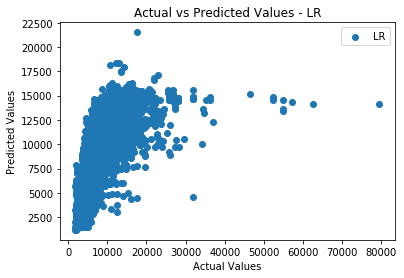

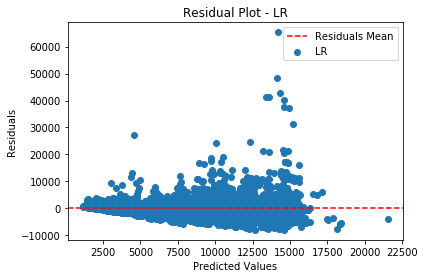

LR AVG Train neg_mean_squared_error is -10046241.009739129
LR AVG Test neg_mean_squared_error is -10082852.750051513
LR AVG Train neg_mean_absolute_error is -2154.0641730178563
LR AVG Test neg_mean_absolute_error is -2156.2278186803387
LR AVG Train r2 is 0.5303344188395018
LR AVG Test r2 is 0.528431201987104
******************************


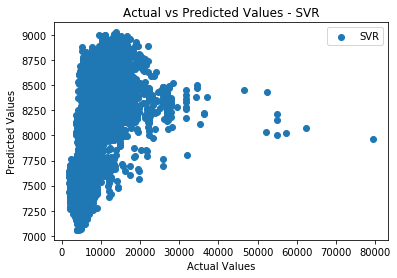

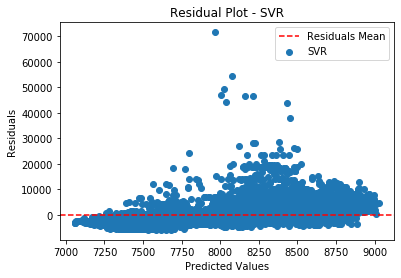

SVR AVG Train neg_mean_squared_error is -19589935.482953303
SVR AVG Test neg_mean_squared_error is -19601523.543114346
SVR AVG Train neg_mean_absolute_error is -3280.611124640177
SVR AVG Test neg_mean_absolute_error is -3282.5732715675017
SVR AVG Train r2 is 0.0840576478865116
SVR AVG Test r2 is 0.08324502786604435
******************************


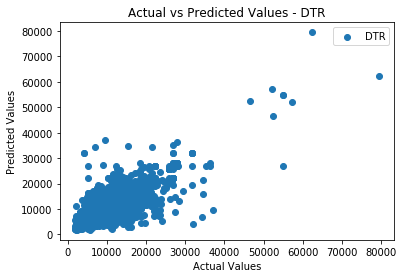

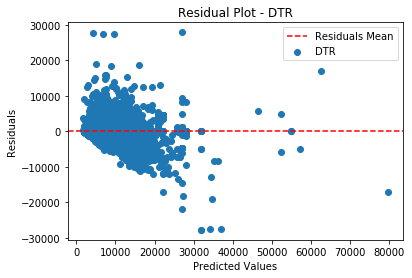

DTR AVG Train neg_mean_squared_error is -1334143.7255232274
DTR AVG Test neg_mean_squared_error is -7773697.450694884
DTR AVG Train neg_mean_absolute_error is -585.7816980157424
DTR AVG Test neg_mean_absolute_error is -1732.77934918868
DTR AVG Train r2 is 0.9376144055686553
DTR AVG Test r2 is 0.6350062717826501
******************************


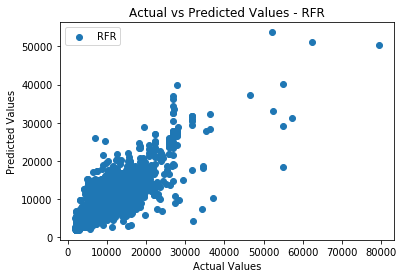

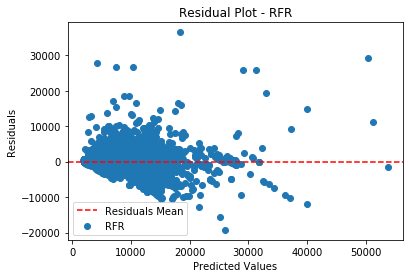

RFR AVG Train neg_mean_squared_error is -1927613.0245418805
RFR AVG Test neg_mean_squared_error is -6156819.0590686565
RFR AVG Train neg_mean_absolute_error is -856.9296432729112
RFR AVG Test neg_mean_absolute_error is -1585.8179250058124
RFR AVG Train r2 is 0.909861395974471
RFR AVG Test r2 is 0.7116154601504221
******************************


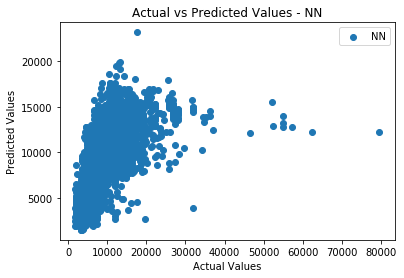

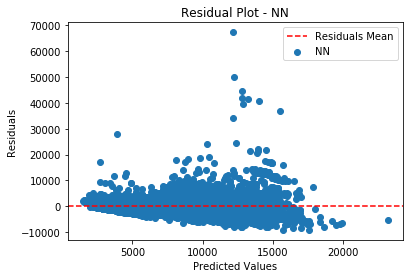

NN AVG Train neg_mean_squared_error is -10540186.447869381
NN AVG Test neg_mean_squared_error is -10588021.074405983
NN AVG Train neg_mean_absolute_error is -2193.261963941131
NN AVG Test neg_mean_absolute_error is -2196.572414870568
NN AVG Train r2 is 0.5072406460344903
NN AVG Test r2 is 0.5046505404548962
******************************


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict

for model in models:
    steps = []
    steps.append(("Encoder", Encoder))
    steps.append(("Scaler", RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps=steps)
    y_pred = cross_val_predict(pipeline, x, y, cv=5)
    
    # Scatter plot of actual vs predicted values
    plt.scatter(y, y_pred, label=model[0])
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values - {model[0]}')
    plt.legend()
    plt.show()
    
    # Residual plot
    residuals = y - y_pred
    plt.scatter(y_pred, residuals, label=model[0])
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--', label='Residuals Mean')
    plt.title(f'Residual Plot - {model[0]}')
    plt.legend()
    plt.show()

    # Other metric printing remains unchanged
    result = cross_validate(pipeline, x, y, cv=5, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], return_train_score=True)
    
    for metric in ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']:
        train_key = f'train_{metric}'
        test_key = f'test_{metric}'
        
        print(f"{model[0]} AVG Train {metric} is {result[train_key].mean()}")
        print(f"{model[0]} AVG Test {metric} is {result[test_key].mean()}")
    
    print("*" * 30)


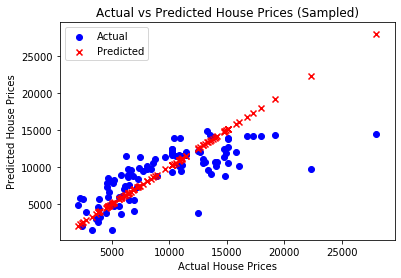

LR AVG Train neg_mean_squared_error is -10046241.009739129
LR AVG Test neg_mean_squared_error is -10082852.750051513
LR AVG Train neg_mean_absolute_error is -2154.0641730178563
LR AVG Test neg_mean_absolute_error is -2156.2278186803387
LR AVG Train r2 is 0.5303344188395018
LR AVG Test r2 is 0.528431201987104


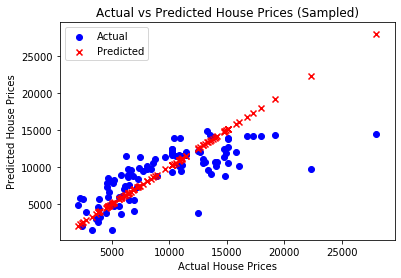

SVR AVG Train neg_mean_squared_error is -19589935.482953303
SVR AVG Test neg_mean_squared_error is -19601523.543114346
SVR AVG Train neg_mean_absolute_error is -3280.611124640177
SVR AVG Test neg_mean_absolute_error is -3282.5732715675017
SVR AVG Train r2 is 0.0840576478865116
SVR AVG Test r2 is 0.08324502786604435


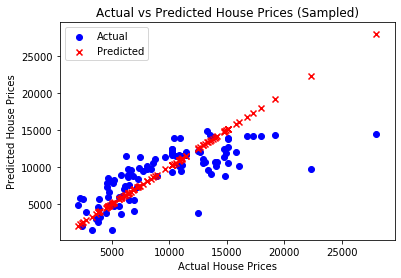

DTR AVG Train neg_mean_squared_error is -1334143.7255232274
DTR AVG Test neg_mean_squared_error is -7773697.450694884
DTR AVG Train neg_mean_absolute_error is -585.7816980157424
DTR AVG Test neg_mean_absolute_error is -1732.77934918868
DTR AVG Train r2 is 0.9376144055686553
DTR AVG Test r2 is 0.6350062717826501


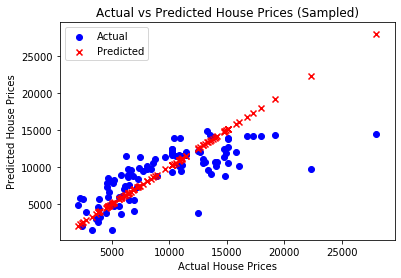

RFR AVG Train neg_mean_squared_error is -1927613.0245418805
RFR AVG Test neg_mean_squared_error is -6156819.0590686565
RFR AVG Train neg_mean_absolute_error is -856.9296432729112
RFR AVG Test neg_mean_absolute_error is -1585.8179250058124
RFR AVG Train r2 is 0.909861395974471
RFR AVG Test r2 is 0.7116154601504221


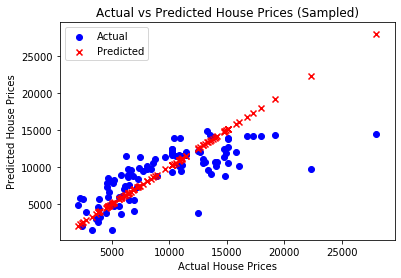

NN AVG Train neg_mean_squared_error is -10589150.951351812
NN AVG Test neg_mean_squared_error is -10631573.93303025
NN AVG Train neg_mean_absolute_error is -2199.951046600322
NN AVG Test neg_mean_absolute_error is -2202.066494971899
NN AVG Train r2 is 0.5049867391492416
NN AVG Test r2 is 0.5024601082254994


In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
import numpy as np
import pandas as pd

# Assuming 'y' is a Series and 'y_pred' is a NumPy array or Series

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Actual': y, 'Predicted': cross_val_predict(pipeline, x, y, cv=5)})

for model in models:
    steps = []
    steps.append(("Encoder", Encoder))
    steps.append(("Scaler", RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps=steps)

    # Randomly sample 100 points from the plot_data DataFrame
    sampled_data = plot_data.sample(100, replace=False, random_state=42)

    # Plotting actual vs predicted values for the sampled points
    plt.scatter(sampled_data['Actual'], sampled_data['Predicted'], color='blue', label='Actual')
    plt.scatter(sampled_data['Actual'], sampled_data['Actual'], color='red', label='Predicted', marker='x')  # Using a different color for predicted points
    plt.xlabel('Actual House Prices')
    plt.ylabel('Predicted House Prices')
    plt.title('Actual vs Predicted House Prices (Sampled)')
    plt.legend()
    plt.show()

    # Other metric printing remains unchanged
    result = cross_validate(pipeline, x, y, cv=5, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], return_train_score=True)
    
    for metric in ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']:
        train_key = f'train_{metric}'
        test_key = f'test_{metric}'
        
        print(f"{model[0]} AVG Train {metric} is {result[train_key].mean()}")
        print(f"{model[0]} AVG Test {metric} is {result[test_key].mean()}")


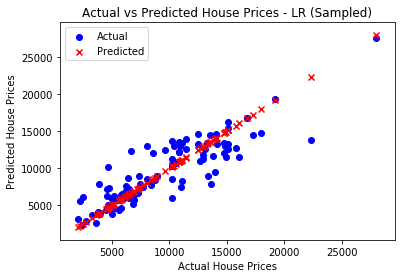

LR AVG Train neg_mean_squared_error is -10046241.009739129
LR AVG Test neg_mean_squared_error is -10082852.750051513
LR AVG Train neg_mean_absolute_error is -2154.0641730178563
LR AVG Test neg_mean_absolute_error is -2156.2278186803387
LR AVG Train r2 is 0.5303344188395018
LR AVG Test r2 is 0.528431201987104
******************************


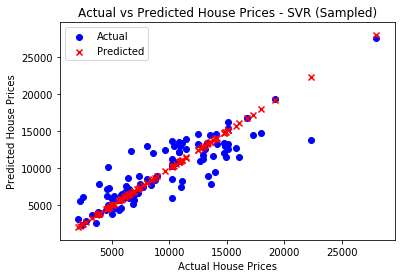

SVR AVG Train neg_mean_squared_error is -19589935.482953303
SVR AVG Test neg_mean_squared_error is -19601523.543114346
SVR AVG Train neg_mean_absolute_error is -3280.611124640177
SVR AVG Test neg_mean_absolute_error is -3282.5732715675017
SVR AVG Train r2 is 0.0840576478865116
SVR AVG Test r2 is 0.08324502786604435
******************************


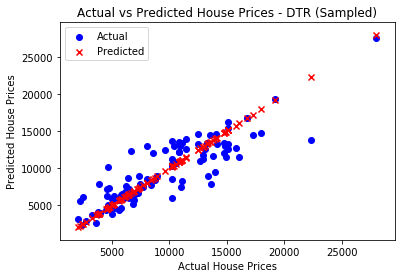

DTR AVG Train neg_mean_squared_error is -1334143.7255232274
DTR AVG Test neg_mean_squared_error is -7773697.450694884
DTR AVG Train neg_mean_absolute_error is -585.7816980157424
DTR AVG Test neg_mean_absolute_error is -1732.77934918868
DTR AVG Train r2 is 0.9376144055686553
DTR AVG Test r2 is 0.6350062717826501
******************************


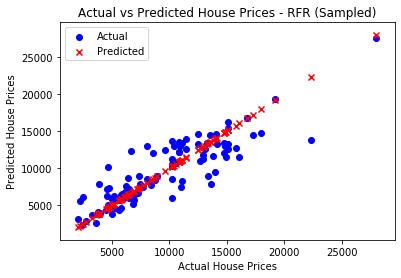

RFR AVG Train neg_mean_squared_error is -1927613.0245418805
RFR AVG Test neg_mean_squared_error is -6156819.0590686565
RFR AVG Train neg_mean_absolute_error is -856.9296432729112
RFR AVG Test neg_mean_absolute_error is -1585.8179250058124
RFR AVG Train r2 is 0.909861395974471
RFR AVG Test r2 is 0.7116154601504221
******************************


In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
import numpy as np
import pandas as pd

# Assuming 'y' is a Series and 'y_pred' is a NumPy array or Series

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Actual': y, 'Predicted': cross_val_predict(pipeline, x, y, cv=5)})

for model in models:
    steps = []
    steps.append(("Encoder", Encoder))
    steps.append(("Scaler", RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps=steps)

    # Randomly sample 100 points from the plot_data DataFrame for each model
    sampled_data = plot_data.sample(100, replace=False, random_state=42)

    # Plotting actual vs predicted values for the sampled points
    plt.scatter(sampled_data['Actual'], sampled_data['Predicted'], color='blue', label='Actual')
    plt.scatter(sampled_data['Actual'], sampled_data['Actual'], color='red', label='Predicted', marker='x')  # Using a different color for predicted points
    plt.xlabel('Actual House Prices')
    plt.ylabel('Predicted House Prices')
    plt.title(f'Actual vs Predicted House Prices - {model[0]} (Sampled)')
    plt.legend()
    plt.show()

    # Other metric printing remains unchanged
    result = cross_validate(pipeline, x, y, cv=5, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], return_train_score=True)
    
    for metric in ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']:
        train_key = f'train_{metric}'
        test_key = f'test_{metric}'
        
        print(f"{model[0]} AVG Train {metric} is {result[train_key].mean()}")
        print(f"{model[0]} AVG Test {metric} is {result[test_key].mean()}")

    print("*" * 30)


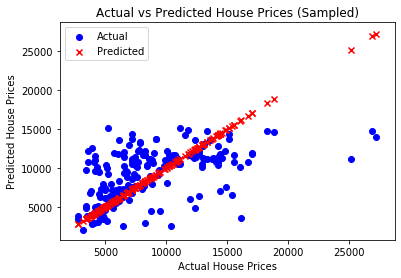

LR AVG Train neg_mean_squared_error is -10046241.009739129
LR AVG Test neg_mean_squared_error is -10082852.750051513
LR AVG Train neg_mean_absolute_error is -2154.0641730178563
LR AVG Test neg_mean_absolute_error is -2156.2278186803387
LR AVG Train r2 is 0.5303344188395018
LR AVG Test r2 is 0.528431201987104
******************************


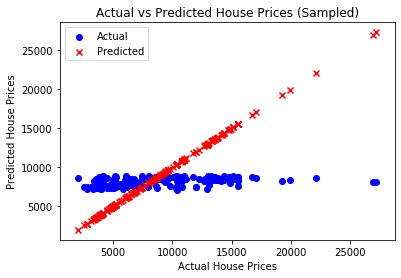

SVR AVG Train neg_mean_squared_error is -19589935.482953303
SVR AVG Test neg_mean_squared_error is -19601523.543114346
SVR AVG Train neg_mean_absolute_error is -3280.611124640177
SVR AVG Test neg_mean_absolute_error is -3282.5732715675017
SVR AVG Train r2 is 0.0840576478865116
SVR AVG Test r2 is 0.08324502786604435
******************************


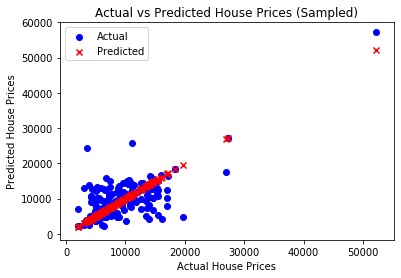

DTR AVG Train neg_mean_squared_error is -1334143.7255232274
DTR AVG Test neg_mean_squared_error is -7773697.450694884
DTR AVG Train neg_mean_absolute_error is -585.7816980157424
DTR AVG Test neg_mean_absolute_error is -1732.77934918868
DTR AVG Train r2 is 0.9376144055686553
DTR AVG Test r2 is 0.6350062717826501
******************************


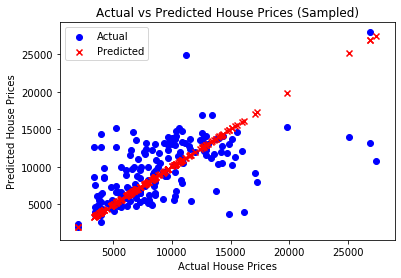

RFR AVG Train neg_mean_squared_error is -1927613.0245418805
RFR AVG Test neg_mean_squared_error is -6156819.0590686565
RFR AVG Train neg_mean_absolute_error is -856.9296432729112
RFR AVG Test neg_mean_absolute_error is -1585.8179250058124
RFR AVG Train r2 is 0.909861395974471
RFR AVG Test r2 is 0.7116154601504221
******************************


In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict

for model in models:
    steps = []
    steps.append(("Encoder", Encoder))
    steps.append(("Scaler", RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps=steps)
    y_pred = cross_val_predict(pipeline, x, y, cv=5)
    
    # Randomly sample 200 points from the range 100 to 1000
    random_indices = np.random.choice(range(100, 1000), size=200, replace=False)

    # Plotting actual vs predicted values for the sampled points
    plt.scatter(y[random_indices], y_pred[random_indices], color='blue', label='Actual')
    plt.scatter(y[random_indices], y[random_indices], color='red', label='Predicted', marker='x')  # Using a different color for predicted points
    plt.xlabel('Actual House Prices')
    plt.ylabel('Predicted House Prices')
    plt.title('Actual vs Predicted House Prices (Sampled)')
    plt.legend()
    plt.show()

    # Other metric printing remains unchanged
    result = cross_validate(pipeline, x, y, cv=5, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], return_train_score=True)
    
    for metric in ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']:
        train_key = f'train_{metric}'
        test_key = f'test_{metric}'
        
        print(f"{model[0]} AVG Train {metric} is {result[train_key].mean()}")
        print(f"{model[0]} AVG Test {metric} is {result[test_key].mean()}")
    
    print("*" * 30)


#### Hyper Parameter Tuning for Multiple Linear Regression model

- Learning Rate
- Regularization

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
steps = []
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(("Model" , RandomForestRegressor(n_estimators = 10, random_state = 0)) )
pipeline = Pipeline(steps = steps)

In [33]:
params = {

 "Model__max_depth"  : range(20,28)
}

In [34]:
grid = GridSearchCV(estimator=pipeline , cv = 5 , param_grid=params , scoring="r2" , return_train_score=True)

In [35]:
results = grid.fit(x,y)

In [36]:
results.cv_results_["mean_train_score"]

array([0.9070819 , 0.90842304, 0.90911381, 0.90857403, 0.90935677,
       0.90960974, 0.90958418, 0.9095513 ])

In [37]:
results.cv_results_["mean_test_score"]

array([0.71889115, 0.71549261, 0.71197991, 0.71135103, 0.7137382 ,
       0.71139215, 0.71124541, 0.71050372])

In [38]:
results.best_params_

{'Model__max_depth': 20}

In [39]:
Final_Model = results.best_estimator_

In [40]:
Final_Model.fit(x,y)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('BE', BinaryEncoder(),
                                                  ['Airline', 'Source',
                                                   'Destination'])])),
                ('Scaler', RobustScaler()),
                ('Model',
                 RandomForestRegressor(max_depth=20, n_estimators=10,
                                       random_state=0))])

In [41]:
import joblib

In [42]:
joblib.dump(Final_Model , "Model.pkl",compress=3)
joblib.dump(x.columns , "Inputs.pkl")

['Inputs.pkl']

In [44]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Day_of_Journey',
       'Number_of_Dep_Time', 'Number_Duration', 'Day_Arrival'],
      dtype='object')

In [45]:
x['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

#### Hyper Parameter Tuning for Multiple Linear Regression model

- Learning Rate
- Regularization

In [1]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
